In [26]:
import os
import itertools

import numpy as np

import networkx as nx
import community as community_louvain

import matplotlib.pyplot as plt

import imageio
from IPython.display import Image

### graph generator:

In [2]:
g = nx.generators.relaxed_caveman_graph(3, 5, .3)

for u, v, w in g.edges(data=True):
    w['weight'] = np.random.randint(1, 1000)

### metrics:

In [80]:
# centrality:
p_rank      = nx.pagerank(g, alpha=0.8)
p_rank_size = [(p_rank[g] * 10e3)for g in g.nodes]

degree      = sorted(nx.degree_centrality(g).items(), 
                     key=lambda x: x[1], reverse=True)

closeness   = sorted(nx.closeness_centrality(g).items(), 
                     key=lambda x: x[1], reverse=True)

betweenness = sorted(nx.betweenness_centrality(g).items(),
                     key=lambda x: x[1], reverse=True)

In [4]:
# clustering:
partition       = community_louvain.best_partition(g)
partition_color = [f'C{k}' for k in partition.values()]

In [70]:
# path finding:
all_spath       = nx.all_shortest_paths(g, 5, 9)
all_spath_edges = [(s[i], s[i+1]) for s in all_spath for i, v in enumerate(s[:-1])]

### viz:

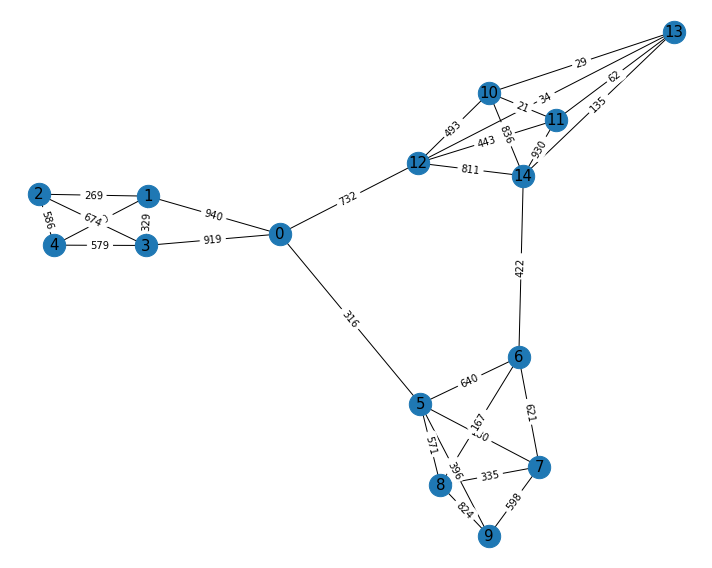

In [6]:
plt.figure(figsize=(10, 8))
plt.axis("off")
plt.tight_layout()

pos = nx.spring_layout(g, seed=7)

# nodes
nx.draw_networkx_nodes(g, pos, node_size=500)

# node labels
nx.draw_networkx_labels(g, pos, font_size=15, font_family="sans-serif")

# edges
nx.draw_networkx_edges(g, pos, edgelist=[(u, v) for (u, v, d) in g.edges(data=True)])

# edge lagel's
labels = nx.get_edge_attributes(g, 'weight')
nx.draw_networkx_edge_labels(g, pos, edge_labels=labels);

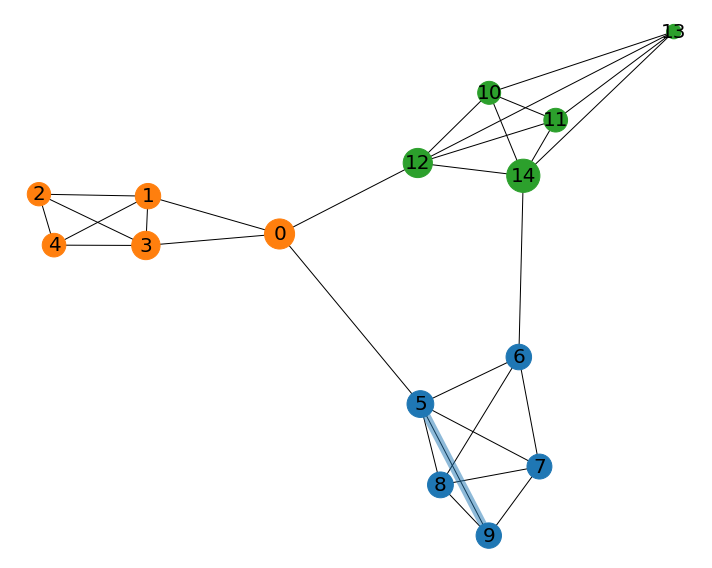

In [81]:
plt.figure(figsize=(10, 8))
plt.axis("off")
plt.tight_layout()

pos = nx.spring_layout(g, seed=7)

# nodes
nx.draw_networkx_nodes(g, pos, node_size=p_rank_size, node_color=partition_color)

# node labels
nx.draw_networkx_labels(g, pos, font_size=20, font_family="sans-serif")


# edges
nx.draw_networkx_edges(g, pos, edgelist=[(u, v) for (u, v, d) in g.edges(data=True)])

# edges path highlight
nx.draw_networkx_edges(g, pos, edgelist=all_spath_edges, width=8, alpha=0.5, edge_color=f'C{partition[5]}');

In [117]:
red_scale  = ['#DAF7A6', '#FFC300', '#FF5733', '#C70039', '#900C3F', '#581845']
r_b_scale  = ['#3358ff', '#849aff', '#d3ddff', '#ffd3d3', '#ff8484', '#ff3333']
r_b_scale2 = ['#154360', '#2980b9', '#d4e6f1', '#f2d7d5', '#c0392b', '#641e16']

_ = [w / sum(nx.get_edge_attributes(g, 'weight').values()) for w in nx.get_edge_attributes(g, 'weight').values()]

edge_c_scale = [np.nan for w in _]
for f in range(6):
    botton, top = (1/80 * f), (1/80 * (f+1))
    if f == 5:
        top = 1
    for i, w in enumerate(_):
        if w >= botton and w < top:
            edge_c_scale[i] = r_b_scale2[f]

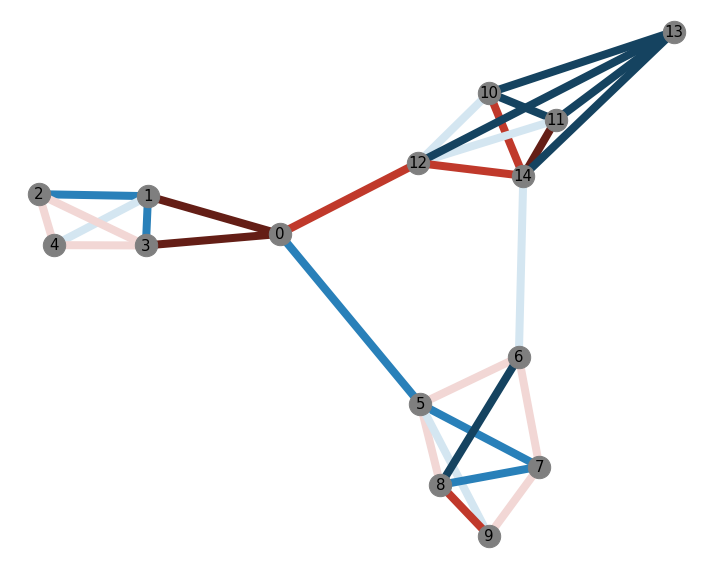

In [118]:
plt.figure(figsize=(10, 8))
plt.axis("off")
plt.tight_layout()

pos = nx.spring_layout(g, seed=7)

# nodes
nx.draw_networkx_nodes(g, pos, node_size=500, node_color='C7')

# node labels
nx.draw_networkx_labels(g, pos, font_size=15, font_family="sans-serif")

# edges
nx.draw_networkx_edges(g, pos, edgelist=[(u, v) for (u, v, d) in g.edges(data=True)])
nx.draw_networkx_edges(g, pos, edgelist=[(u, v) for (u, v, d) in g.edges(data=True)], width=8, edge_color=edge_c_scale);

In [16]:
file_paths = []
for plot_ in range(5):

    closeness_rank = closeness[1:2]
    visited, edge_list = [], []
    for node in closeness_rank:
        suns = list(nx.bfs_edges(g, node[0], depth_limit=plot_))
        edge_list += suns
        visited   += [_[1] for _ in suns]
        
    plt.figure(figsize=(10, 8))
    plt.axis("off")
    plt.tight_layout()   
    
    pos = nx.spring_layout(g, seed=7)    
        
    # nodes
    node_size = 450
    nx.draw_networkx_nodes(g, 
                           pos, 
                           nodelist=[n for n in g.nodes() if n not in [_[0] for _ in closeness_rank]], 
                           node_size=node_size, node_shape='s')    

    nx.draw_networkx_nodes(g, 
                           pos, 
                           nodelist=[n for n in g.nodes() if n in [_[0] for _ in closeness_rank]], 
                           node_size=node_size, 
                           node_shape='s', node_color='C8')

    # node labels
    nx.draw_networkx_labels(g, pos, font_size=15, font_family="sans-serif")

    # edges
    nx.draw_networkx_edges(g, pos, edgelist=[(u, v) for (u, v) in g.edges()], alpha=.3)

    if plot_ != 0:

        nx.draw_networkx_nodes(g, 
                               pos, 
                               nodelist=[n for n in g.nodes() if n in visited], 
                               node_size=node_size, 
                               node_shape='s', node_color='C2')

        # node labels
        nx.draw_networkx_labels(g, pos, font_size=15, font_family="sans-serif")

        # edges
        nx.draw_networkx_edges(g, pos, edgelist=[(u, v) for (u, v) in g.edges()], alpha=.3)

        nx.draw_networkx_edges(g, pos, edgelist=edge_list, width=8, edge_color='C8', alpha=.5)

    
    # create file name and append it to a list
    filename = f'gif_{plot_}.png'
    file_paths.append(filename)
    
    # save frame
    plt.savefig(filename)
    plt.close();

In [17]:
with imageio.get_writer('mygif.gif', mode='I', duration=1) as writer:
    for filename in file_paths:
        image = imageio.imread(filename)
        writer.append_data(image)
    
# Remove files
for filename in set(file_paths):
    os.remove(filename)

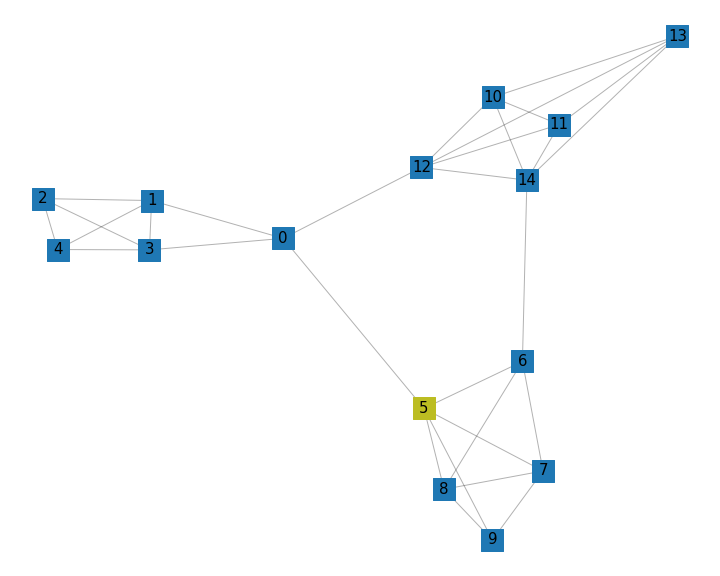

In [18]:
with open('mygif.gif','rb') as file:
    display(Image(file.read()))

In [ ]:
betweenness_paths = []
for u, v in itertools.product(g.nodes, repeat=2):
    if u != v:
        all_spath_b = [s for s in nx.all_shortest_paths(g, u, v)]
        for path in all_spath_b:
            if betweenness[0][0] in path and path[0] != betweenness[0][0] and path[-1] != betweenness[0][0]:
                betweenness_paths.append(path)

all_spath_b_edges = set([(s[i], s[i+1]) for s in betweenness_paths for i, v in enumerate(s[:-1])])

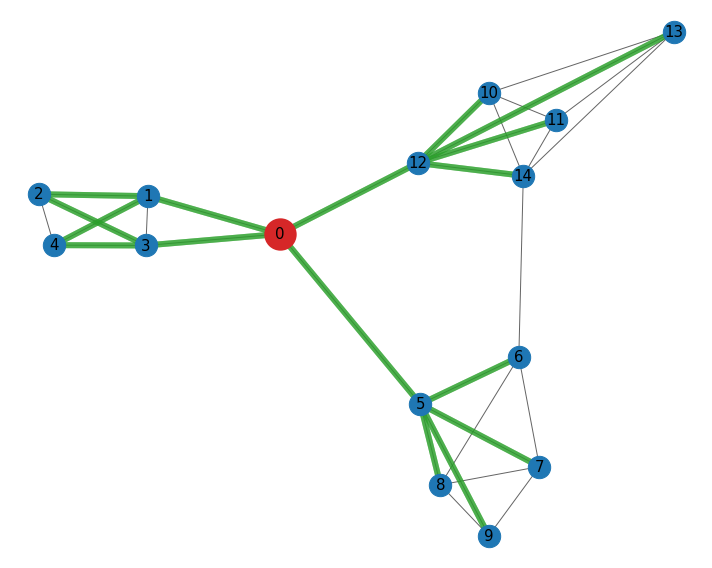

In [127]:
plt.figure(figsize=(10, 8))
plt.axis("off")
plt.tight_layout()

pos = nx.spring_layout(g, seed=7)

# nodes
nx.draw_networkx_nodes(g, pos, nodelist=[node for node in g.nodes if node != betweenness[0][0]], node_size=500, node_color='C0')
nx.draw_networkx_nodes(g, pos, nodelist=[node for node in g.nodes if node == betweenness[0][0]], node_size=500, node_color='C3', linewidths=10)

# node labels
nx.draw_networkx_labels(g, pos, font_size=15, font_family="sans-serif")

# edges
nx.draw_networkx_edges(g, pos, edgelist=[(u, v) for (u, v, d) in g.edges(data=True)], alpha=.6)
nx.draw_networkx_edges(g, pos, edgelist=[(u, v) for (u, v) in all_spath_b_edges], width=6, edge_color='C2', alpha=.6);